In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers.core import Dense, Activation

In [9]:
import csv

In [16]:
data = []
with open('data/newsample.csv', 'r', encoding='iso-8859-1') as f:
    reader = csv.reader(f)
    for row in reader:
        data.append(row[: 26])
        
data = pd.DataFrame(np.array(data))

In [17]:
data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
1,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,...,12,9,4,0,1,0,0,1.53,4.5,6.5
2,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,...,9,3,10,0,2,0,0,11,5.5,1.33
3,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,...,11,8,5,3,3,2,0,1.25,6.5,15
4,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,19,12,9,1,3,0,0,1.83,3.6,5
5,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,...,10,6,7,1,1,0,0,1.7,3.8,5.75
6,E0,12/08/17,Southampton,Swansea,0,0,D,0,0,D,...,13,13,0,2,1,0,0,1.62,4,6.5
7,E0,12/08/17,Watford,Liverpool,3,3,D,2,1,H,...,8,3,3,0,3,0,0,6,4.2,1.62
8,E0,12/08/17,West Brom,Bournemouth,1,0,H,1,0,H,...,3,8,2,3,1,0,0,2.4,3.3,3.3
9,E0,13/08/17,Man United,West Ham,4,0,H,1,0,H,...,7,11,1,2,2,0,0,1.3,5.75,12


In [18]:
fixture = []
x = 0
size = 10

for i in range(data.shape[0]):
    d = data[x:size]
    for index, row in d.iterrows():
        if (row[2] == 'Liverpool' or row[3] == 'Liverpool') and (row[2] == 'Aston Villa' or row[3] == 'Aston Villa'):
            fixture.append(row) 
    
    x += 10
    size += 10


fixture = pd.DataFrame(fixture)

In [19]:
fixture

""


In [20]:
fixtures = []
x = 0
size = 10

for i in range(data.shape[0]):
    d = data[x:size]
    for index, row in d.iterrows():
        if (row[2] == 'Liverpool' or row[3] == 'Liverpool'):
            if row[2] == 'Liverpool':
                row.drop([3, 5, 6, 8, 9, 10, 12, 14, 16, 18, 20, 22, 23, 24, 25], inplace=True)
                row = [x for x in row if x != 'NaN']
                fixtures.append(row) 
                
            elif row[3] == 'Liverpool':
                row.drop([2, 4, 6, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23, 24, 25], inplace=True)
                row = [x for x in row if x != 'NaN']
                fixtures.append(row) 
            
    x += 10
    size += 10


fixtures = pd.DataFrame(fixtures)

In [43]:
fixtures

,0,1,2,3,4,5,6,7,8,9,10
0,E0,12/08/17,Liverpool,3,1,14,5,8,3,3,0
1,E0,19/08/17,Liverpool,1,0,23,13,12,4,1,0
2,E0,27/08/17,Liverpool,4,2,18,10,6,4,2,0
3,E0,09/09/17,Liverpool,0,0,10,3,9,3,2,1
4,E0,16/09/17,Liverpool,1,1,35,9,7,12,1,0
5,E0,23/09/17,Liverpool,3,2,23,6,14,6,3,0
6,E0,01/10/17,Liverpool,1,1,17,2,6,5,1,0
7,E0,14/10/17,Liverpool,0,0,19,5,7,7,0,0
8,E0,22/10/17,Liverpool,1,1,12,7,8,5,1,0
9,E0,28/10/17,Liverpool,3,0,16,8,10,9,0,0


In [23]:
season = []
all_seasons = []

try:
    for i in range(1, 27):
        if i not in range(9, 16):
            with open('data/E0 ({}).csv'.format(i), mode='r', encoding='iso-8859-1') as f:
                reader = csv.reader((line.replace('\0','') for line in f))
                for row in reader:
                    season.append(row[:26])

#             all_seasons.append(season)
except csv.Error:
    print('null byte')
    
data = pd.DataFrame(np.array(season))

In [24]:
data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
1,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,...,12,9,4,0,1,0,0,1.53,4.5,6.5
2,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,...,9,3,10,0,2,0,0,11,5.5,1.33
3,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,...,11,8,5,3,3,2,0,1.25,6.5,15
4,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,19,12,9,1,3,0,0,1.83,3.6,5
5,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,...,10,6,7,1,1,0,0,1.7,3.8,5.75
6,E0,12/08/17,Southampton,Swansea,0,0,D,0,0,D,...,13,13,0,2,1,0,0,1.62,4,6.5
7,E0,12/08/17,Watford,Liverpool,3,3,D,2,1,H,...,8,3,3,0,3,0,0,6,4.2,1.62
8,E0,12/08/17,West Brom,Bournemouth,1,0,H,1,0,H,...,3,8,2,3,1,0,0,2.4,3.3,3.3
9,E0,13/08/17,Man United,West Ham,4,0,H,1,0,H,...,7,11,1,2,2,0,0,1.3,5.75,12


In [49]:
fixtures = []

x = 0
size = 10

for i in range(data.shape[0]):
    d = data[x:size]
    for index, row in d.iterrows():
        
        record = np.empty(14, dtype=object)
        
        if (row[2] == 'Liverpool' or row[3] == 'Liverpool'):
            
            row = row.tolist()
            record[0] = row[1].split('/')[1]
            
            if row[2] == 'Liverpool':
                record[1] = 1
                
                if row[9] == 'A': record[4] = 0 
                elif row[9] == 'H': record[4] = 3
                else: record[4] = 1
                    
            elif row[3] == 'Liverpool':
                record[1] = 0
                
                if row[9] == 'A': record[4] = 3 
                elif row[9] == 'H': record[4] = 0
                else: record[4] = 1
            
            record[2] = row[7]
            record[3] = row[8]
            record[5] = row[23]
            record[6] = row[24]
            record[7] = row[25]
            
            # y's
            record[8] = row[4]
            record[9] = row[5]
            record[10] = row[17]
            record[11] = row[18]
            record[12] = row[19]
            record[13] = row[20]
            
            fixtures.append(record)
            
            
    x += 10
    size += 10


fixtures = pd.DataFrame(fixtures)

In [50]:
fixtures

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,08,0,2,1,0,6,4.2,1.62,3,3,3,3,0,3
1,08,1,0,0,1,1.36,5.25,9.5,1,0,4,2,1,3
2,08,1,2,0,3,2.15,3.7,3.5,4,0,4,3,2,4
3,09,0,2,0,0,1.85,4,4.2,5,0,8,3,2,2
4,09,1,1,1,1,1.29,6,13,1,1,12,2,1,2
5,09,0,1,2,3,4.1,3.9,1.91,2,3,3,6,3,3
6,10,0,1,1,1,5,3.8,1.67,1,1,1,5,1,1
7,10,1,0,0,1,2.8,3.25,2.8,0,0,7,3,0,2
8,10,0,3,1,0,2.25,3.5,3.39,4,1,3,5,0,1
9,10,1,0,0,1,1.25,6.75,13,3,0,9,2,0,1


In [34]:
dataset = fixtures.astype('float64').values
X = dataset[:,0:8]
Y = dataset[:,8:]

array([[ 8.   ,  0.   ,  0.   ,  1.   ,  3.   ,  3.1  ,  3.2  ,  2.25 ],
       [ 8.   ,  1.   ,  0.   ,  1.   ,  0.   ,  1.57 ,  3.5  ,  6.5  ],
       [ 8.   ,  0.   ,  1.   ,  0.   ,  0.   ,  3.2  ,  3.25 ,  2.2  ],
       [ 9.   ,  1.   ,  2.   ,  0.   ,  3.   ,  1.444,  3.75 ,  8.5  ],
       [ 9.   ,  0.   ,  1.   ,  0.   ,  0.   ,  2.   ,  3.2  ,  3.75 ],
       [ 9.   ,  1.   ,  2.   ,  0.   ,  3.   ,  1.4  ,  4.   ,  9.   ],
       [10.   ,  0.   ,  0.   ,  0.   ,  1.   ,  1.8  ,  3.1  ,  5.   ],
       [10.   ,  0.   ,  2.   ,  0.   ,  0.   ,  3.4  ,  3.25 ,  2.1  ],
       [10.   ,  1.   ,  0.   ,  0.   ,  1.   ,  1.5  ,  3.6  ,  7.5  ],
       [10.   ,  0.   ,  2.   ,  1.   ,  0.   ,  5.   ,  3.1  ,  1.8  ],
       [11.   ,  1.   ,  0.   ,  0.   ,  1.   ,  1.5  ,  3.6  ,  7.5  ],
       [11.   ,  1.   ,  2.   ,  1.   ,  3.   ,  1.5  ,  3.5  ,  8.   ],
       [11.   ,  0.   ,  1.   ,  0.   ,  0.   ,  2.5  ,  3.2  ,  2.75 ],
       [11.   ,  1.   ,  1.   ,  0.   ,  3.   ,  3.

In [75]:
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Activation('linear'))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')

In [120]:
x = model.fit(X, Y, epochs=15, batch_size=8, validation_split = 0.3)
score = model.evaluate(X, Y, batch_size=8)
preds = model.predict(X)

Train on 26 samples, validate on 12 samples
Epoch 1/15
26/26 [==============================] - 0s 366us/step - loss: 0.4519 - val_loss: 0.4585
Epoch 2/15
26/26 [==============================] - 0s 349us/step - loss: 0.4473 - val_loss: 0.4606
Epoch 3/15
26/26 [==============================] - 0s 431us/step - loss: 0.4446 - val_loss: 0.4612
Epoch 4/15
26/26 [==============================] - 0s 528us/step - loss: 0.4446 - val_loss: 0.4618
Epoch 5/15
26/26 [==============================] - 0s 537us/step - loss: 0.4447 - val_loss: 0.4623
Epoch 6/15
26/26 [==============================] - 0s 520us/step - loss: 0.4451 - val_loss: 0.4625
Epoch 7/15
26/26 [==============================] - 0s 552us/step - loss: 0.4446 - val_loss: 0.4626
Epoch 8/15
26/26 [==============================] - 0s 592us/step - loss: 0.4448 - val_loss: 0.4631
Epoch 9/15
26/26 [==============================] - 0s 576us/step - loss: 0.4448 - val_loss: 0.4631
Epoch 10/15
26/26 [==============================] - 0s 

In [121]:
preds[1:5]

array([[0.8509924],
       [1.2747822],
       [2.974653 ],
       [1.4512885]], dtype=float32)

In [82]:
Y[1:5]

array([[2.],
       [1.],
       [3.],
       [2.]])

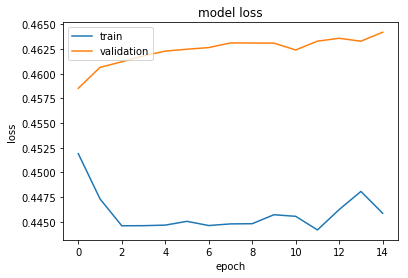

In [122]:
plt.plot(x.history['loss'])
plt.plot(x.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()